In [2]:
#Tarea 4 Modelos: Procesos aleatorios. 
#Kaseng Fong - B42609
#Hecho con los ejemplos visto en clases.
from scipy import stats
from scipy import signal 
from scipy import integrate 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import csv

#Se extrae los bits en un arreglo 
bits = []
with open ("bits10k.csv",'r') as X:
    lines = X.read().splitlines()

    for row in lines:
        bits.append(float(row))

print(bits[0:10])#imprimiendo los priemeros 10 bits para verificar que esten correctos      

[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]


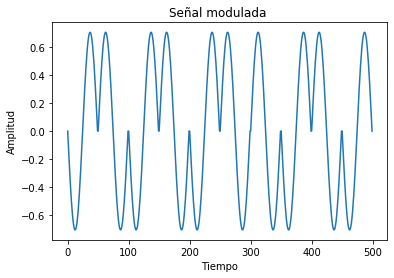

In [3]:
#Definiendo los parametros para generar la senal modulada BPSK

#Definimos la frecuencia 
f = 5000 #Hz

# Periodo de cada bit modulado
T = 1/f 

#Número de muestras 
p = 50

tp = np.linspace(0,T,p)


#creación de la forma de onda de la portadora de amplitud unitario
sen = np.sin(2*np.pi*f*tp) 


#Numero de todos los bits 
N = len(bits)

# frecuencia de muestreo: aqui no existen las señales continuas 
#es el numero de muestras por segundo 
#determina la capacidad de recuperar toda la onda  y densisdad espectral de potencia 
fs =  p/T 


# Creación de la linea temporal para todas la señal Tx 
t = np.linspace(0,N*T,N*p)


#Inicializar el vector de señal 
#señal modulada 
senal = np.zeros(t.shape) #cada cada valor de señal a un valor de t 


#creación de la señal modulada BPSK, asi hacemos la modulaciones 
for k, b in enumerate(bits):
    senal[k*p:(k+1)*p] = np.cos(np.dot(2 * np.pi * fs, T) + np.pi * (b - 1) + np.pi / 4)*sen


# visualización de los primeros bits modulados 
pb = 10 #primeros bits pb

plt.figure()
plt.plot(senal[0:pb*p]) # p es muy importante por que es el de muestreo, el que me dibuja la señal 
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal modulada ')
plt.show()


In [4]:
# Parte 2 
#Potencia promedio 


# Potencia instantánea
Pinstantanea = senal**2

# Potencia promedio a partir de la potencia instantánea 
Pm = integrate.trapz(Pinstantanea, t) / (N * T)

print("La potencia promedio es de : ",Pm)


La potencia promedio es de :  0.24500049000096372



Para el valor SNR=-2dB  Se genera un ruido dado por=
[ 0.16888165  0.26681881  0.05291077 ...  0.37726299 -0.76026873
  1.23310569]


Para el valor SNR=-1dB  Se genera un ruido dado por=
[ 0.25775998 -0.1673544   0.18370783 ...  0.00729928  0.65891877
  0.79303796]


Para el valor SNR=0dB  Se genera un ruido dado por=
[-1.03413259 -0.78169578 -0.93034608 ... -0.08474547 -0.79184388
 -0.21716729]


Para el valor SNR=1dB  Se genera un ruido dado por=
[ 0.52231212 -0.0066624   0.00929105 ... -1.06998817  0.3770598
 -0.75392128]


Para el valor SNR=2dB  Se genera un ruido dado por=
[-0.34086839  0.42945836 -0.37460739 ...  0.05916468  0.64743199
 -0.97421726]


Para el valor SNR=3dB  Se genera un ruido dado por=
[-0.13174826 -0.13219199 -0.07266355 ... -0.34040327 -0.18025813
  0.09882866]



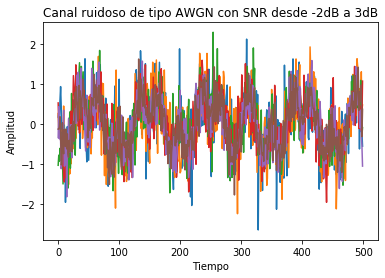

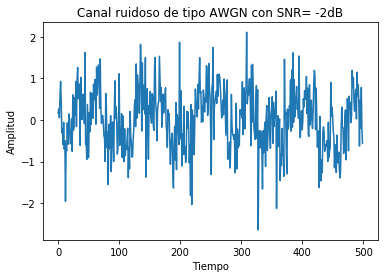

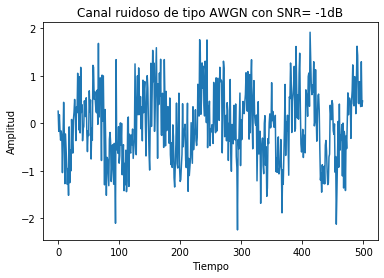

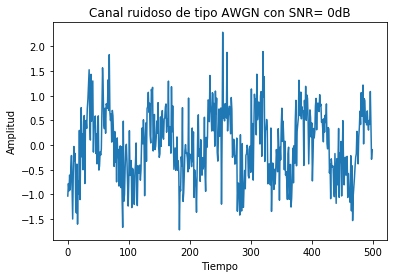

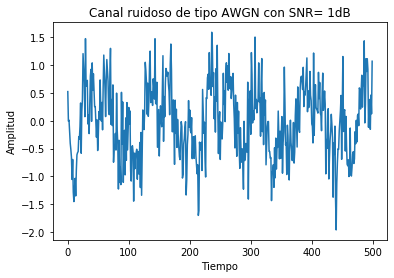

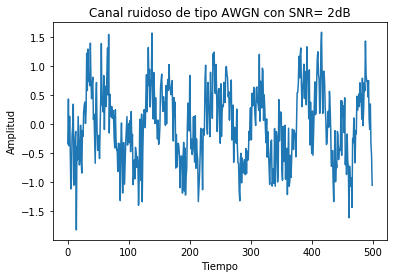

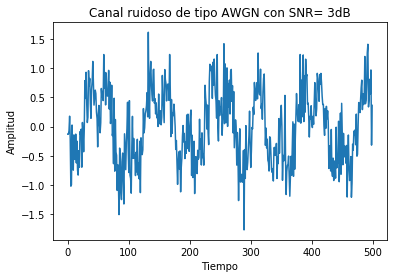

In [5]:
#Parte 3

# Metiendo un canal ruidoso  AWGN a la senal 


SNR=np.arange(-2,4) #iniciar el vector del rango de decibeles para la SNR deseada

Rx_lista=[] #iniciar el vector que guarda el ruido RX de cada SNR en una lista para usarlo posteriormente en la parte 5.
 
#imprime la visualizacion de cada SNR en la señal portadora 
for i in SNR:
    Pn =0
    Pn = Pn +( Pm / (10**(i/10)))                           # Potencia del ruido para SNR y potencia de la señal dadas
    sigma = np.sqrt(Pn)                                     # Desviación estándar del ruido
    ruido = np.random.normal(0, sigma, senal.shape)         # Se simula la señal recibida en el canal 
    Rx = senal + ruido                                      # Se crea ruido a partir de (Pn = sigma^2)
    Rx_lista.append(Rx)                                     #Guardo cada RX generado en la lista RX_lista para usarlo en el error
    
    plt.plot(Rx[0:pb*p])# Visualización  del ruido de cada  SNR  individualmente de los primeros bits recibidos
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title('Canal ruidoso de tipo AWGN con SNR desde -2dB a 3dB')


#imprime el vector de cada ruido RX en el canal con su respectivo SNR
for j in range(len(Rx_lista)):   
    Rx =Rx_lista[j]
    plt.figure()
    plt.plot(Rx[0:pb*p])
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    title = "Canal ruidoso de tipo AWGN con SNR= {}dB".format(SNR[j])
    plt.title(title)
    print("\nPara el valor SNR={}dB  Se genera un ruido dado por=\n{}\n".format(SNR[j],Rx_lista[j]))






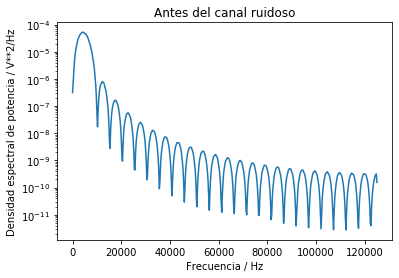

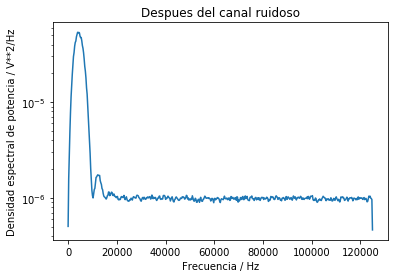

In [6]:
#Parte 4 
#Densidad espectral de potencia 

# Senal inicial antes de pasar por el canal ruidoso de la parte 3
fw, PSD = signal.welch(senal, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.title('Antes del canal ruidoso')


# Senal cuando pasa por el canal ruidos.
fw, PSD = signal.welch(Rx, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.title('Despues del canal ruidoso')

plt.show()

In [7]:
# Parte 5

bits_shape = np.shape(bits)# variable que me da la información de datos de los bits (bits.shape no funcionó)

# Pseudo-energía de la onda original
Es = np.sum(sen**2)

# Bits recibidos en este arreglo; 
bitsRx = np.zeros(bits_shape)

BER_lista=[] # guardo los valores de BER para utilizarlo en la parte 6

# Decodificación de la señal por detección de energía para cada SNR
for i in range(len(Rx_lista)): # Recorrer la lista obtenida del ruido RX de cada SNR del punto 3
    Rx=Rx_lista[i]
    for k, b in enumerate(bits):
        Ep = np.sum(Rx[k*p:(k+1)*p] * sen)
        
        if Ep > Es/2:
            bitsRx[k] = 1
        else:
            bitsRx[k] = 0

    err = np.sum(np.abs(bits - bitsRx))
    BER = err/N
    BER_lista.append(BER) # Lista del bit error rate para cada nivel de SNR
    
    print('Cuando la señal pasa por el canal con un ruido de SNR= {}dB entonces, la señal decodificada tiene un total de {} errores en {} bits con una tasa de error de {}.'.format(SNR[i],err, N,BER))# se obtienen todos los datos para graficar BRE VS SNR




Cuando la señal pasa por el canal con un ruido de SNR= -2dB entonces, la señal decodificada tiene un total de 264.0 errores en 10000 bits con una tasa de error de 0.0264.
Cuando la señal pasa por el canal con un ruido de SNR= -1dB entonces, la señal decodificada tiene un total de 157.0 errores en 10000 bits con una tasa de error de 0.0157.
Cuando la señal pasa por el canal con un ruido de SNR= 0dB entonces, la señal decodificada tiene un total de 104.0 errores en 10000 bits con una tasa de error de 0.0104.
Cuando la señal pasa por el canal con un ruido de SNR= 1dB entonces, la señal decodificada tiene un total de 42.0 errores en 10000 bits con una tasa de error de 0.0042.
Cuando la señal pasa por el canal con un ruido de SNR= 2dB entonces, la señal decodificada tiene un total de 37.0 errores en 10000 bits con una tasa de error de 0.0037.
Cuando la señal pasa por el canal con un ruido de SNR= 3dB entonces, la señal decodificada tiene un total de 10.0 errores en 10000 bits con una tasa d

Text(0.5, 1.0, 'BER VS SNR')

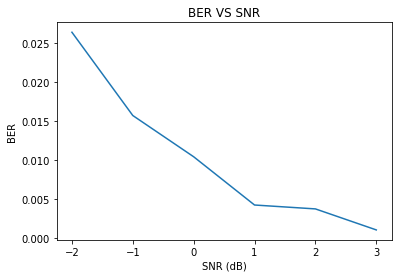

In [8]:
#Parte 6

# se realiza la gráfica a partir de los arreglos de SNR y BER_lista
plt.figure()
plt.plot(SNR,BER_lista)  
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER VS SNR')






